In [ ]:
#https://github.com/bwcho75/dataanalyticsandML/blob/master/Clustering/5.%20DBSCANClustering-IRIS%204%20feature-Copy1.ipynb

In [1]:
from sklearn import datasets
import pandas as pd
iris = datasets.load_iris()

labels = pd.DataFrame(iris.target)
labels.columns=['labels']
data = pd.DataFrame(iris.data)
data.columns=['Sepal length','Sepal width','Petal length','Petal width']
data = pd.concat([data,labels],axis=1)

data.head()

,Sepal length,Sepal width,Petal length,Petal width,labels
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [2]:
feature = data[ ['Sepal length','Sepal width','Petal length','Petal width']]
feature.head()

,Sepal length,Sepal width,Petal length,Petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot  as plt
import seaborn as sns

# create model and prediction
model = DBSCAN(eps=0.3,min_samples=6)
predict = pd.DataFrame(model.fit_predict(feature))
predict.columns=['predict']

# concatenate labels to df as a new column
r = pd.concat([feature,predict],axis=1)

print(r)

     Sepal length  Sepal width  Petal length  Petal width  predict
0             5.1          3.5           1.4          0.2        0
1             4.9          3.0           1.4          0.2        0
2             4.7          3.2           1.3          0.2        0
3             4.6          3.1           1.5          0.2        0
4             5.0          3.6           1.4          0.2        0
5             5.4          3.9           1.7          0.4       -1
6             4.6          3.4           1.4          0.3        0
7             5.0          3.4           1.5          0.2        0
8             4.4          2.9           1.4          0.2        0
9             4.9          3.1           1.5          0.1        0
10            5.4          3.7           1.5          0.2        0
11            4.8          3.4           1.6          0.2        0
12            4.8          3.0           1.4          0.1        0
13            4.3          3.0           1.1          0.1     

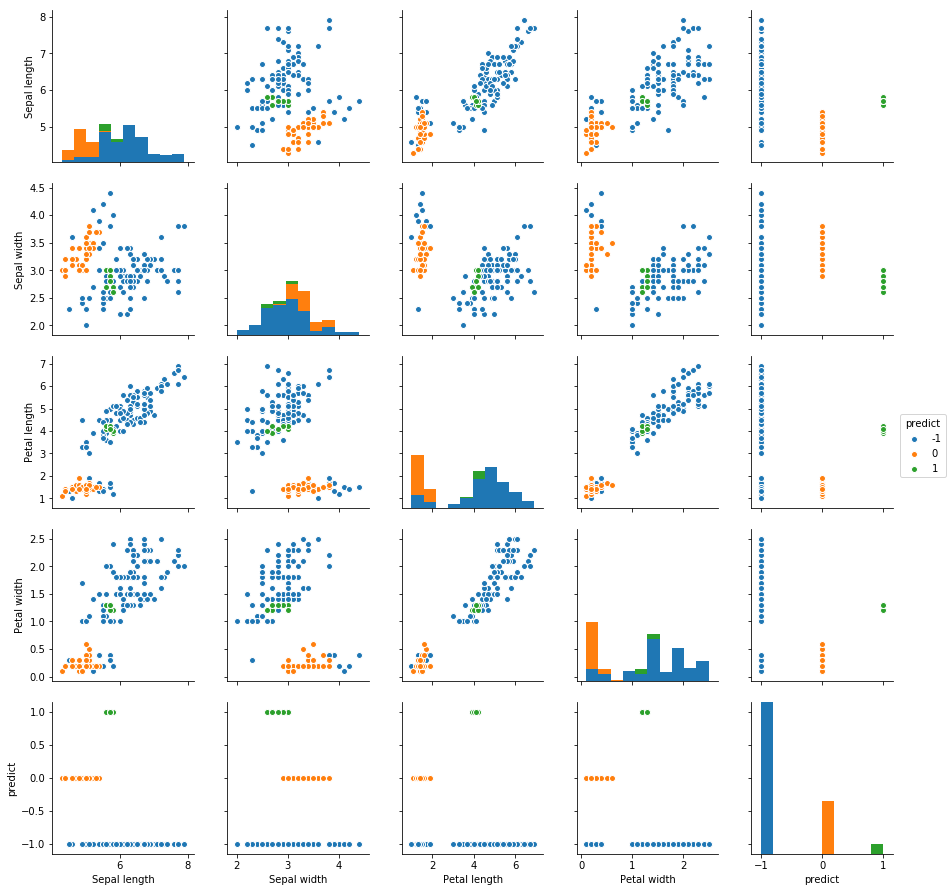

In [4]:
#pairplot with Seaborn
sns.pairplot(r,hue='predict')
plt.show()

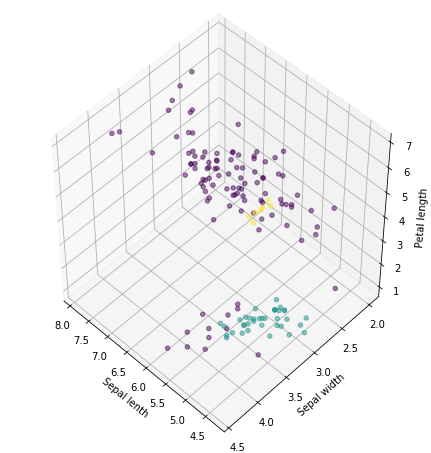

In [5]:
from mpl_toolkits.mplot3d import Axes3D
# scatter plot
fig = plt.figure( figsize=(6,6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
ax.scatter(r['Sepal length'],r['Sepal width'],r['Petal length'],c=r['predict'],alpha=0.5)
ax.set_xlabel('Sepal lenth')
ax.set_ylabel('Sepal width')
ax.set_zlabel('Petal length')
plt.show()

In [6]:
ct = pd.crosstab(data['labels'],r['predict'])
print (ct)

predict  -1   0   1
labels             
0        13  37   0
1        43   0   7
2        50   0   0


In [7]:
from  sklearn.pipeline  import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

scaler = StandardScaler()
model = DBSCAN(min_samples=6)
pipeline = make_pipeline(scaler,model)
predict = pd.DataFrame(pipeline.fit_predict(feature))
predict.columns=['predict']

# concatenate labels to df as a new column
r = pd.concat([feature,predict],axis=1)

ct = pd.crosstab(data['labels'],r['predict'])
print (ct)

predict  -1   0   1   2   3
labels                     
0         8  42   0   0   0
1        13   0  31   6   0
2        22   0  10   0  18


In [8]:
def k_cohesion(model1):
    X=feature.values
    total_mean=np.mean(X[:,0])
    m1=np.mean(X[model1.predict==0,0])
    m2=np.mean(X[model1.predict==1,0])
    m3=np.mean(X[model1.predict==2,0])
    m4=np.mean(X[model1.predict==3,0])
    m5=np.mean(X[model1.predict==-1,0])
    count1=np.count_nonzero(model1.labels_== 0)
    count2=np.count_nonzero(model1.labels_== 1)
    count3=np.count_nonzero(model1.labels_== 2)
    count4=np.count_nonzero(model1.labels_== 3)
    count5=np.count_nonzero(model1.labels_== -1)
    separation=count1*(total_mean-m1)**2+count2*(m2-total_mean)**2+count3*(m3-total_mean)**2
    print(separation)

In [10]:
import numpy as np
k_cohesion(model)

AttributeError: 'DBSCAN' object has no attribute 'predict'

In [11]:
predict

,predict
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,-1
9,0
